In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline

In [6]:
print("Download and Extract MNIST dataset")
mnist = input_data.read_data_sets('data/', one_hot=True)
print("type of 'minist' is %s" % (type(mnist)))
print("number of train data is %d" % (mnist.train.num_examples))
print("number of test data is %d" % (mnist.test.num_examples))

W0111 08:39:44.899354 4536235456 deprecation.py:323] From <ipython-input-6-1d7db0abb6de>:2: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0111 08:39:44.911386 4536235456 deprecation.py:323] From /Users/tyler/anaconda/envs/tylertf/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0111 08:39:44.913725 4536235456 deprecation.py:323] From /Users/tyler/anaconda/envs/tylertf/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed

Download and Extract MNIST dataset
Extracting data/train-images-idx3-ubyte.gz


W0111 08:39:45.174987 4536235456 deprecation.py:323] From /Users/tyler/anaconda/envs/tylertf/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0111 08:39:45.178778 4536235456 deprecation.py:323] From /Users/tyler/anaconda/envs/tylertf/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.
W0111 08:39:45.236904 4536235456 deprecation.py:323] From /Users/tyler/anaconda/envs/tylertf/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.pyth

Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
type of 'minist' is <class 'tensorflow.contrib.learn.python.learn.datasets.base.Datasets'>
number of train data is 55000
number of test data is 10000


In [7]:
# What does the mnist dataset look like?
print("What does the 'mnist dataset' look like?")
trainimg = mnist.train.images
trainlabel = mnist.train.labels
testimg = mnist.test.images
testlabel = mnist.test.labels

print("type of 'trainimg' is %s" % (type(trainimg)))
print("type of 'trainlabel' is %s" % (type(trainlabel)))
print("type of 'testimg' is %s" % (type(testimg)))
print("type of 'testlabel' is %s" % (type(testlabel)))
print("shape of 'trainimg' is %s" % (trainimg.shape,))
print("shape of 'trainlabel' is %s" % (trainlabel.shape,))
print("shape of 'testimg' is %s" % (testimg.shape,))
print("shape of 'testlabel' is %s" % (testlabel.shape,))



What does the 'mnist dataset' look like?
type of 'trainimg' is <class 'numpy.ndarray'>
type of 'trainlabel' is <class 'numpy.ndarray'>
type of 'testimg' is <class 'numpy.ndarray'>
type of 'testlabel' is <class 'numpy.ndarray'>
shape of 'trainimg' is (55000, 784)
shape of 'trainlabel' is (55000, 10)
shape of 'testimg' is (10000, 784)
shape of 'testlabel' is (10000, 10)


In [8]:
# How does the training data look like?

What does the 'training data' look like?
14504th training Datalabel is 0
20565th training Datalabel is 9
20918th training Datalabel is 1
41629th training Datalabel is 8
37816th training Datalabel is 4


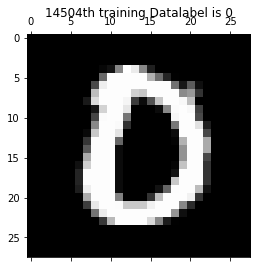

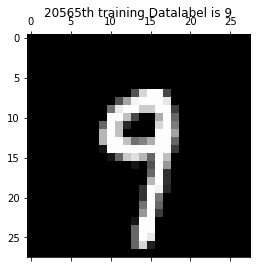

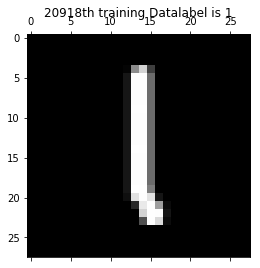

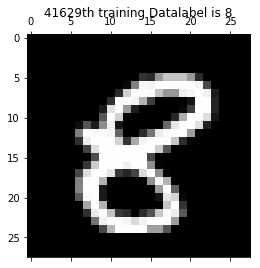

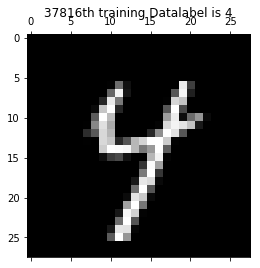

In [9]:
print("What does the 'training data' look like?")
nsample =5 
randidx = np.random.randint(trainimg.shape[0], size=nsample)

for i in randidx:
    curr_img = np.reshape(trainimg[i,:],(28,28))
    curr_label = np.argmax(trainlabel[i,:])
    plt.matshow(curr_img, cmap=plt.get_cmap('gray'))
    plt.title(""+str(i)+"th training Data"+ "label is "+ str(curr_label))
#     print()
    print(""+str(i)+"th training Data"+ "label is "+ str(curr_label))
    

In [10]:
# Batch Learning?
print("Batch Learning?")
batch_size = 100
batch_xs, batch_ys = mnist.train.next_batch(batch_size)
print("type of 'batch_xs' is %s" % (type(batch_xs)))
print("type of 'batch_ys' is %s" % (type(batch_ys)))
print("shape of 'batch_xs' is %s" % (batch_xs.shape,))
print("type of 'batch_ys' is %s" % (batch_ys.shape,))

# 100作为一个batch,返回的batch_size就是shape为100的数据

Batch Learning?
type of 'batch_xs' is <class 'numpy.ndarray'>
type of 'batch_ys' is <class 'numpy.ndarray'>
shape of 'batch_xs' is (100, 784)
type of 'batch_ys' is (100, 10)


In [15]:
x = tf.placeholder("float", [None,784])
y = tf.placeholder("float", [None,10]) #None is for infinite
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
# Logistic regression model
actv = tf.nn.softmax(tf.matmul(x,W)+b) # softmax 是为了多分类
# cost function
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(actv),reduction_indices=1))
# log这个是损失函数 再乘上y,由于别的分类都是0,所以只有正确分类的值保留了
# optimizr
learning_rate = 0.01
optm =tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)#依然是梯度下降 让它还是尽量减小损失函数的值

In [16]:
#prediction
pred = tf.equal(tf.argmax(actv, 1),tf.argmax(y,1)) # 看看预测值的索引是不是等于label值的索引
# accuracy
accr = tf.reduce_mean(tf.cast(pred,"float")) # 把预测结果转换成float类型
# initializer
init = tf.global_variables_initializer()


In [19]:
sess = tf.InteractiveSession()
arr = np.array([[31, 23,  4, 24, 27, 34],
               [18,  3, 25,  0,  6, 35],
               [28, 14, 33, 22, 20,  8],
               [13, 30, 21, 19,  7,  9],
               [16,  1, 26, 32,  2, 29],
               [17, 12,  5, 11, 10, 15]])
#tf.rank(arr).eval() 查看矩阵有几层
#tf.shape(arr).eval() 矩阵的形状
#tf.argmax(arr,0).eval()  求最大值的索引  0 是按列求 1是按行来求

/Users/tyler/anaconda/envs/tylertf/lib/python3.6/site-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [27]:
training_epochs =50 # 把所有的样本迭代50次
batch_size =100 # 每次拿多少数据量
display_step =5 # 为了展示而设定的一个参数
#SESSION
sess = tf.Session()
sess.run(init)
# MINI-BATCH LEARNING
for epoch in range(training_epochs):
    avg_cost = 0
    num_batch =int(mnist.train.num_examples/batch_size)
    for i in range(num_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        sess.run(optm, feed_dict={x:batch_xs, y:batch_ys})
        feeds = {x:batch_xs, y:batch_ys}
        avg_cost +=sess.run(cost, feed_dict=feeds)/num_batch
    #DISPLAY
    if epoch % display_step ==0:
        feeds_train ={x:batch_xs, y:batch_ys}
        feeds_test = {x:mnist.test.images,y:mnist.test.labels}
        train_acc = sess.run(accr,feed_dict=feeds_train)
        test_acc = sess.run(accr, feed_dict=feeds_test)
        print("Epoch:%03d/%03d cost: %.9f train_acc:%.3f test_acc:%.3f"
             % (epoch, training_epochs, avg_cost, train_acc,test_acc))
print("DONE")

Epoch:000/050 cost: 1.176906777 train_acc:0.860 test_acc:0.855
Epoch:005/050 cost: 0.441151905 train_acc:0.850 test_acc:0.895
Epoch:010/050 cost: 0.383115305 train_acc:0.920 test_acc:0.904
Epoch:015/050 cost: 0.357370322 train_acc:0.920 test_acc:0.909
Epoch:020/050 cost: 0.341354543 train_acc:0.920 test_acc:0.912
Epoch:025/050 cost: 0.330855462 train_acc:0.890 test_acc:0.915
Epoch:030/050 cost: 0.322459187 train_acc:0.870 test_acc:0.915
Epoch:035/050 cost: 0.316058499 train_acc:0.910 test_acc:0.917
Epoch:040/050 cost: 0.310783381 train_acc:0.920 test_acc:0.918
Epoch:045/050 cost: 0.306480573 train_acc:0.900 test_acc:0.919
DONE
